In [2]:
import pandas as pd

# load dataset
df = pd.read_csv("C:/Users/Mko/Documents/pd-risk-model/data/credit_risk_dataset.csv")

# show first rows
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.shape

(32581, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [8]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
indices = df[(df['person_age'] > 100) | (df['person_emp_length'] > 60)].index
df.drop(indices, inplace=True)

In [10]:
# Fill missing values
# Impute missing interest rates with the mean
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

# Impute missing employment length with the median, considering its right-skewed distribution due to outliers
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

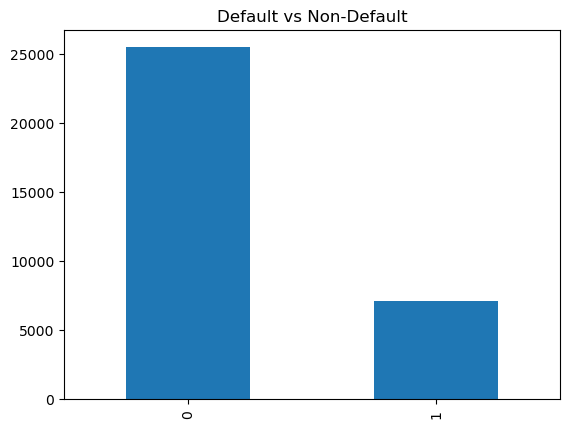

In [12]:
#default distribution
import matplotlib.pyplot as plt

df['loan_status'].value_counts().plot(kind='bar')
plt.title("Default vs Non-Default")
plt.show()

In [15]:
df.groupby('loan_status')['loan_amnt'].mean()
#this means borrowers who defaulted had larger average loan amount

loan_status
0     9236.648408
1    10847.104967
Name: loan_amnt, dtype: float64

In [16]:
df.groupby('loan_status')['person_income'].mean()
#Lower income → higher default probability.

loan_status
0    70554.030628
1    49124.262839
Name: person_income, dtype: float64

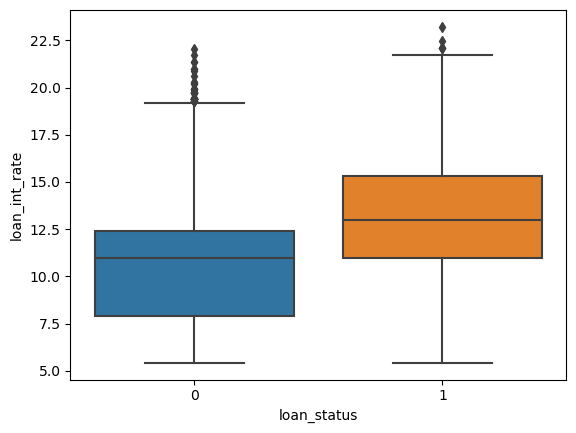

In [17]:
import seaborn as sns

sns.boxplot(x='loan_status', y='loan_int_rate', data=df)
plt.show()

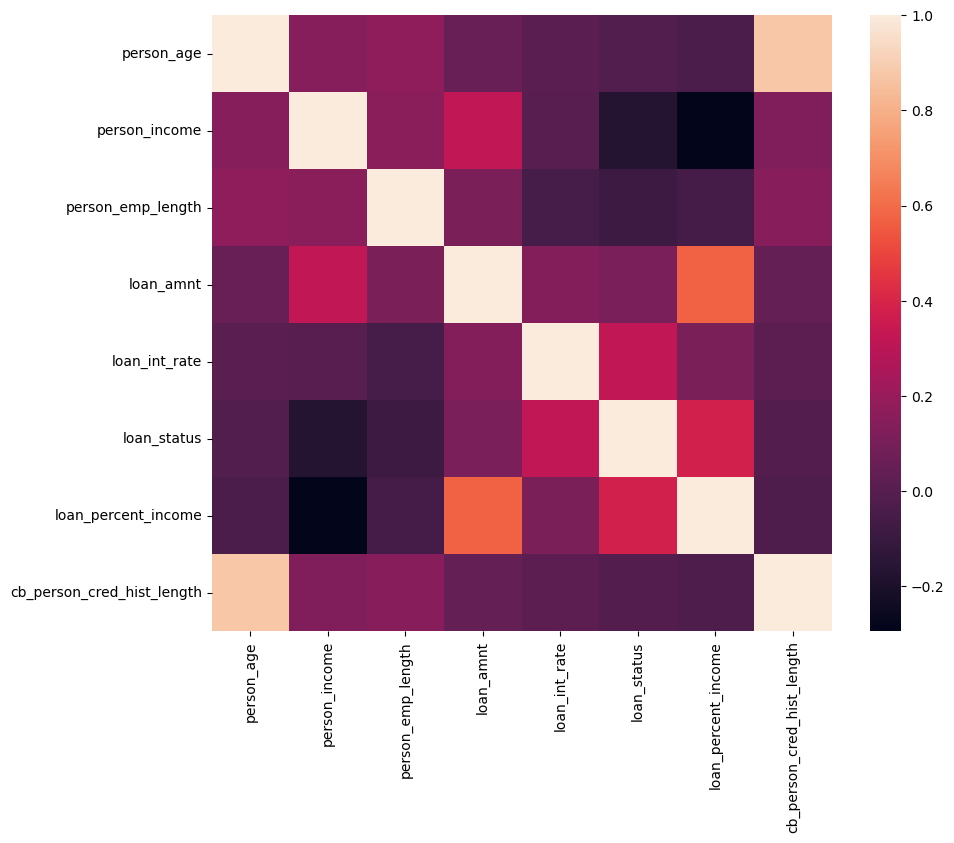

In [19]:
import numpy as np

numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=False)
plt.show()

In [21]:
df = pd.get_dummies(df, drop_first=True)

In [22]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,0,0,...,0,1,0,0,1,0,0,0,0,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,0,0,...,0,1,0,0,0,0,0,0,0,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,0,1,0,0,0,0,0,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,0,0,...,0,1,0,1,0,0,0,0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32574 entries, 1 to 32580
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32574 non-null  int64  
 1   person_income                32574 non-null  int64  
 2   person_emp_length            32574 non-null  float64
 3   loan_amnt                    32574 non-null  int64  
 4   loan_int_rate                32574 non-null  float64
 5   loan_status                  32574 non-null  int64  
 6   loan_percent_income          32574 non-null  float64
 7   cb_person_cred_hist_length   32574 non-null  int64  
 8   person_home_ownership_OTHER  32574 non-null  uint8  
 9   person_home_ownership_OWN    32574 non-null  uint8  
 10  person_home_ownership_RENT   32574 non-null  uint8  
 11  loan_intent_EDUCATION        32574 non-null  uint8  
 12  loan_intent_HOMEIMPROVEMENT  32574 non-null  uint8  
 13  loan_intent_MEDI

In [24]:
df.isnull().sum().sum()

0

In [ ]:
##### Feature engineering ####

In [26]:
df['dti_ratio'] = df['loan_amnt'] / df['person_income']

In [27]:
df['loan_size_group'] = pd.qcut(df['loan_amnt'], 4, labels=False)

In [29]:
df['risk_interaction'] = df['loan_int_rate'] * df['dti_ratio']

In [31]:
df.corr()['loan_status'].sort_values(ascending=False).head(10)

loan_status                    1.000000
risk_interaction               0.453596
dti_ratio                      0.385760
loan_percent_income            0.379250
loan_int_rate                  0.319302
loan_grade_D                   0.318868
person_home_ownership_RENT     0.238416
loan_grade_E                   0.180130
cb_person_default_on_file_Y    0.179002
loan_amnt                      0.105240
Name: loan_status, dtype: float64

In [ ]:
####### Model ###########

In [34]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [43]:
pd_prob = model.predict_proba(X_test_scaled)[:,1]


In [44]:
pd_prob[:10]

array([0.04007707, 0.06127759, 0.00337573, 0.6776915 , 0.21072871,
       0.03596489, 0.39128415, 0.52953179, 0.0108273 , 0.77983131])

In [45]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, pd_prob)
print("ROC AUC:", roc_auc)

ROC AUC: 0.887509068188495


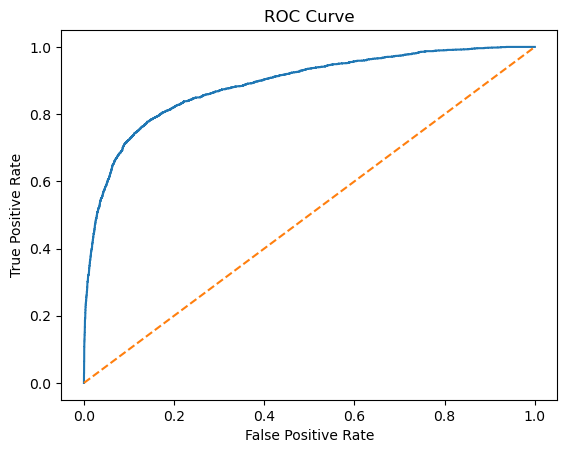

In [46]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, pd_prob)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [47]:
gini = 2 * roc_auc - 1
print("Gini:", gini)

Gini: 0.7750181363769899


In [ ]:
#Create Credit Risk Ratings#

In [48]:
import pandas as pd

pd_rating = pd.cut(
    pd_prob,
    bins=[0,0.02,0.05,0.10,0.20,1],
    labels=['A','B','C','D','E']
)

In [49]:
results = pd.DataFrame({
    'Actual_Default': y_test.values,
    'PD': pd_prob,
    'Rating': pd_rating
})

results.head()

,Actual_Default,PD,Rating
0,0,0.040077,B
1,0,0.061278,C
2,0,0.003376,A
3,1,0.677692,E
4,0,0.210729,E


In [50]:
results['Rating'].value_counts()

E    3308
B    1823
A    1610
C    1588
D    1444
Name: Rating, dtype: int64

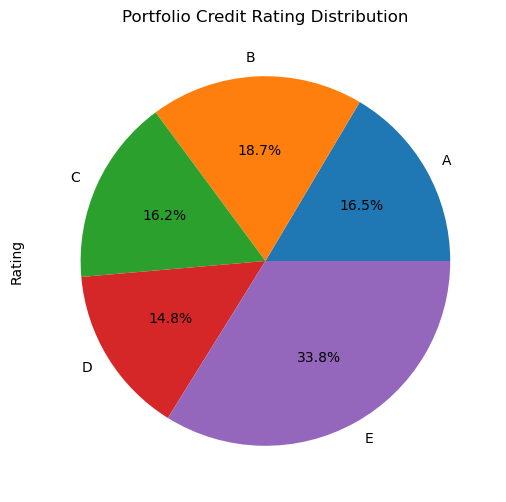

In [51]:
import matplotlib.pyplot as plt

# Pie chart of portfolio ratings
results['Rating'].value_counts().sort_index().plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Portfolio Credit Rating Distribution'
)
plt.show()